CS-E5740 Complex Networks,
Answers to exercise set 7 <br>
**Adam Ilyas 725819**

# Weight–topology correlations in social networks

In this exercise, we will do some weighted network analysis using a social network data set describing private messaging in a Facebook-like web-page 1 . 

In the network, 
- each node corresponds to a user of the website and 
- link weights describe the total number of messages exchanged
between users.

In the file `OClinks_w_undir.edg`, the three entries of each row describe one link:
(node_i node_j w_ij),
where the last entry w_ij is the weight of the link between nodes node_i and node_j.

You can use the accompanying Python template (`weight_topology_correlations.py`) to get
started. scipy.stats.binned_statistic function is especially useful throughout this exercise.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import binned_statistic

from weight_topology_correlations import create_linbins
from weight_topology_correlations import create_logbins
from weight_topology_correlations import get_link_weights
from weight_topology_correlations import plot_ccdf
from weight_topology_correlations import get_link_overlap

%matplotlib inline

In [2]:
import os
if not os.path.isdir("./image_1"):
    os.mkdir("image_1")
if not os.path.isdir("./image_2"):
    os.mkdir("image_2")

Before performing more sophisticated analysis, it is always good to get some idea
on how the network is like. To this end, 
## a) plot the complementary cumulative distribution
(1-CDF) for node degree k, node strength s and link weight w.

Show all three distributions in one plot using loglog-scale.

In [3]:
# Loading the network
#TODO: set correct network path and name
network_path = './data/OClinks_w_undir.edg'
net_name = 'fb_like'
#TODO: replace with a path where to save the 1-CDF plot
path = './image_1/ccdfs_' + net_name + '.png'
#TODO: replace with a base path where to save the average link weight scatter
# A scale-related suffix will be added to this base path 
# so the figures will not overwritte
base_path = './image_1/s_per_k_vs_k_'
#TODO: replace with a base path where to save the link neighborhood overlap plot
save_path_linkneighborhoodplot = './O_vs_w_' + net_name + '.png'

In [4]:
network = nx.read_weighted_edgelist(network_path)

# First, getting the node degrees and strengths
degrees = nx.degree(network)
strengths =  nx.degree(network, weight = 'weight')

#Now, converting the degree and strength into lists.
degree_vec = []
strength_vec = []
for node in network.nodes():
    degree_vec.append(degrees[node])
    strength_vec.append(strengths[node])

# Then, computing the weights
weights = get_link_weights(network)

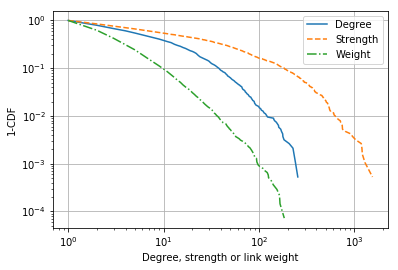

In [5]:
# Now let's start solving the exercise.
# 1a: creating 1-CDF plots
datavecs = [degree_vec, strength_vec, weights]
num = 'a)' + net_name # figure identifier

#TODO: set the correct labels
labels = ['Degree', 'Strength', 'Weight']
xlabel = 'Degree, strength or link weight'
ylabel = '1-CDF'

fig=plot_ccdf(datavecs, labels, xlabel, ylabel, num, path)

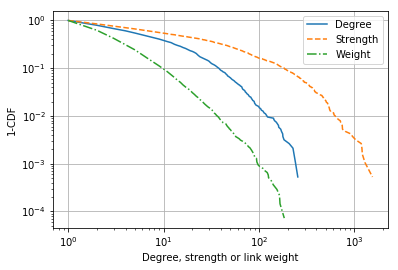

In [6]:
fig

### Show all three distributions in one plot using loglog-scale.

/home/adam/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


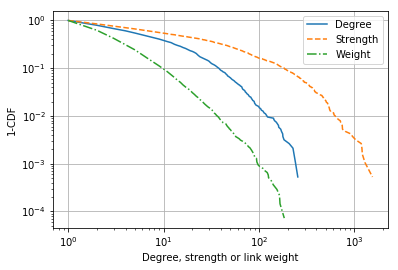

In [7]:
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
fig

In [8]:
fig.savefig(path)
print('1-CDF figure saved to ' + path)

1-CDF figure saved to ./image_1/ccdfs_fb_like.png


### Briefly describe the distributions: are they Gaussian, power laws or something else?

They follow the Gaussian Distribution as the graph is concave. 

### Based on the plots, roughly estimate the 90th percentiles of the degree, strength, and weight distributions.

To get the  $90^{th}$ percintiles, we check the x-axes values while $1 − CDF = 10^{-1}$.

The $90^{th}$ percentiles for Degree, strength or link weight is as follows:
- Degree: $\approx 40$
- Strength: $\approx 160$
- Link weight: $\approx 10$

Next, we will study how the average link weight per node $\rangle w \langle = \frac{k}{s}$ behaves as
a function of the node degree $k$. 

## b) Compute $s$, $k$, and $\langle w \rangle = \frac{k}{s}$ for each node. 

Make a
scatter plot of  $\langle w \rangle$ as a function of $k$. Create two versions of the scatter plot: one with
linear and one with logarithmic x-axes.

The large variance of the data can make the scatter plots a bit messy. 

## c) To make the relationship between $\langle w \rangle$  and $k$ more visible, create bin-averaged versions of the plots,

i.e. divide nodes into bins based on their degree and calculate the average hwi in
each bin. Now, you should be able to spot a trend in the data.

/home/adam/anaconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Average link weight scatter saved to ./image_1/s_per_k_vs_k_linear_fb_like.png
Average link weight scatter saved to ./image_1/s_per_k_vs_k_log_fb_like.png


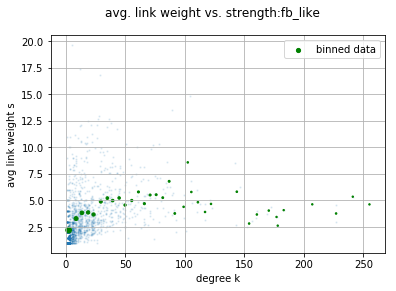

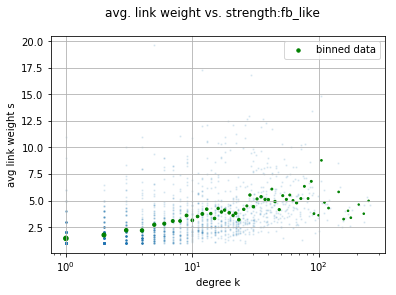

In [10]:
# 1b: average link weight per node
av_weight = degrees = [strength/degree for strength, degree 
                       in zip(strength_vec, degree_vec)]
#TODO: calculate average link weight per node
# YOUR CODE HERE

# Since 1b and 1c solution plots
# can be drawn in one figure for linear and one figure for logarithmic
# then, let's plot the scatters and bin averages in one figure
# creating scatters and adding bin averages on top of them

n_bins = 50 #TIP: use the number of bins you find reasonable
min_deg = min(degree_vec)
max_deg = max(degree_vec)
linbins = create_linbins(min_deg, max_deg, n_bins)
logbins = create_logbins(0.5, max_deg, n_bins, n_lin=10)
num = 'b) ' + net_name + "_"
alpha = 0.1 # transparency of data points in the scatter

for bins, scale in zip([linbins, logbins], ['linear', 'log']):
    fig = plt.figure(num + scale)
    ax = fig.add_subplot(111)
    # mean degree value of each degree bin
    degree_bin_means, _, _ = ([], [], [])
    # TODO: use binned_statistic to get mean degree of each bin 
    degree_bin_means, _, _ =binned_statistic(
        x = degree_vec, 
        values=degree_vec, 
        bins=bins,statistic='mean')
    # mean strength value of each degree bin    
    strength_bin_means, _, _ = ([], [], [])
    # TODO: use binned_statistic to get mean strength of each bin)
    strength_bin_means, _, _ =binned_statistic(
        x = degree_vec, 
        values=strength_vec, 
        bins=bins,
        statistic='mean')
    # number of points in each degree bin
    counts, _, _ = ([], [], [])
    # TODO: use binned_statistic to get number of data points
    counts, _, _ = binned_statistic(
        x = degree_vec, 
        values=degree_vec, 
        bins=bins,statistic='count')
        
        
    # 1b: plotting all points (scatter)
    ax.scatter(degree_vec, av_weight, marker='o', s=1.5, alpha=alpha)
    # calculating the average weight per bin
    bin_av_weight = strength_bin_means / degree_bin_means

    # 1c: and now, plotting the bin average
    # the marker size is scaled by number of data points in the bin
    ax.scatter(degree_bin_means,
               bin_av_weight,
               marker='o',
               color='g',
               s=np.sqrt(counts) + 1,
               label='binned data')
    ax.set_xscale(scale)
    min_max = np.array([min_deg, max_deg])
    ax.set_xlabel('degree k')
    ax.set_ylabel('avg link weight s')
    ax.grid()

    ax.legend(loc='best')
    plt.suptitle('avg. link weight vs. strength:' + net_name)
    base_path = './image_1/s_per_k_vs_k_'
    save_path = base_path + scale + '_' + net_name + '.png'
    fig.savefig(save_path)
    print('Average link weight scatter saved to ' + save_path)

## d) Based on the plots created in b), answer the following questions questions:

### Which of the two approaches (linear or logarithmic x-axes) suits better for presenting $\langle w \rangle$ as a function of $k$? Why?

For $\langle w \rangle$ as a function of $k$, we would choose logarithmic x-axes because it is a better representation since most of
binned data points degrees are between  1 and 100.

### In social networks, $\langle w \rangle$ typically decreases as a function of the degree due to time constraints required for taking care of social contacts. Are your results in accordance with this observation? If not, how would you explain this?

As the degree (k) increases, average link weight increases\. We can explain this via homophily based on the assumption that people who have more friends spend more time
on Facebook sending more messages to friends who has many friends has well. This is a safe assumption as the network is a a real social media network.

After some point around k=100, the average weight link decreases,
due to time constraints.

---------

Lets consider a link between nodes $i$ and $j$. For this link, link neighborhood overlap
$O_{ij}$ is defined as the fraction of common neighbors of $i$ and $j$ out of all their neighbors
$$ O_{ij} = \frac{n_{ij}}{(k_i - 1) + (k_j - 1) - n_{ij}}$$

According to the Granovetter hypothesis, link neighborhood overlap is an increasing func-
tion of link weight in social networks. 

## e) Next, your task is now to find out whether this is the case also for the present data set.
To this end, calculate the link neighborhood overlap for each link. 4

### Create a scatter plot showing the overlaps as a function of link weight. As in c), produce also a bin-averaged version of the plot. Use a binning strategy that is most suitable for this case.

In [11]:
def get_link_overlap(net):
    overlaps = []
    links = net.edges()
    for (i, j) in links:
        n_ij = len([val for val in net.neighbors(i) if val in net.neighbors(j)])
        k_i, k_j = nx.degree(net, i), nx.degree(net, j)

        if n_ij==0:
            overlaps.append(0)
        else:
            overlap = n_ij / (k_i + k_j - 2 - n_ij)
            overlaps.append(overlap)
    return overlaps

/home/adam/anaconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Link neighborhood overlap scatter saved as ./O_vs_w_fb_like.png


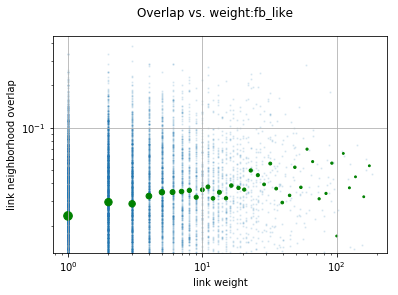

In [12]:
# 1e: getting link neighborhood overlaps
overlaps = get_link_overlap(network)

# creating link neighborhood overlap scatter
num = 'd) + net_name'
fig = plt.figure(num)
ax = fig.add_subplot(111)

n_bins = 50 #TIP: use the number of bins you find reasonable
min_w = np.min(weights)
max_w = np.max(weights)

linbins = create_linbins(min_w, max_w, n_bins)
logbins = create_logbins(min_w, max_w, n_bins)

#TODO: try both linear and logarithmic bins, select the best one
bins = logbins

# mean weight value of each weight bin
weight_bin_means, _, _ = binned_statistic(x = weights, 
                                          values=weights, 
                                          bins=bins,statistic='mean'
                                         )
#TODO: use binned_statistic to get mean weight of each bin
# mean link neighborhood overlap of each weight bin
overlap_bin_means, _, _ = binned_statistic(x = weights, 
                                           values=overlaps, 
                                           bins=bins,statistic='mean'
                                          )
#TODO: use binned_statistic to get mean overlap of each bin 
# number of points in each weigth bin
counts, _, _ =binned_statistic(x = weights, 
                               values=weights, 
                               bins=bins,statistic='count'
                              )
#TODO: use binned_statistic to get number of data points
# plotting all points (overlap)
ax.scatter(weights, overlaps, marker="o", s=1.5, alpha=alpha)
# plotting bin average, marker size scaled by number of data points in the bin
ax.scatter(weight_bin_means,
           overlap_bin_means,
           s=np.sqrt(counts) + 2,
           marker='o',
           color='g')

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('link weight')
ax.set_ylabel('link neighborhood overlap')
fig.suptitle('Overlap vs. weight:' + net_name)
fig.savefig(save_path_linkneighborhoodplot)
print('Link neighborhood overlap scatter saved as ' + 
      save_path_linkneighborhoodplot)

In the end, you should be able to spot a subtle trend in the data. Based on your plot,
answer the following questions:

### Is this trend in accordance with the Granovetter hypothesis? If not, how would you explain your findings?

Since there us a log linear relation between linkweight and link neighbourhood overlap such that a log increase in link weight will relate to the overlap, up to link weight = 10, Granovetter hypothesis
holds.

# 2) Network thresholding and spanning trees: the case of US air traffic

In this exercise, we will get familiar with different approaches to thresholding networks, and also
learn how they can be used for efficiently visualizing networks. Now, you are given a network
describing the US Air Traffic between 14th and 23rd December 2008 2 . In the network, each node
corresponds to an airport and link weights describe the number of flights between the airports
during the time period.

The data and some code for visualizing the network is provided at the course web-page. The
network is given in the file `aggregated_US_air_traffic_network_undir.edg`, and
`us_airport_id_info.csv` contains information about names and locations of the airports. The
file `air_traffic_network_base.py` contains a function for visualizing the air transport network,
and an example how to use it. You can extend your own work to the same file, or import the file
as a Python module. In this exercise, you may also freely use all available networkx functions.

When facing a new network, it is always good to first get some idea, how the network
is like. 

##  a) Thus, compute and list the following basic network properties:

- Number of network nodes N , number of links L, and density D
- Network diameter d
- Average clustering coefficient C

In [13]:
from thresholding_and_spanning_trees import plot_network_usa

In [16]:
csv_path = './data/US_airport_id_info.csv'
network_path = "./data/aggregated_US_air_traffic_network_undir.edg"
bg_figname = './data/US_air_bg.png'

id_data = np.genfromtxt(csv_path, delimiter=',', dtype=None, names=True)
xycoords = {}
for row in id_data:
    xycoords[str(row['id'])] = (row['xcoordviz'], row['ycoordviz'])
net = nx.read_weighted_edgelist(network_path)

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """


In [17]:
print(f'No. of nodes: {len(nx.nodes(net))}')
print(f'No. of edges: {len(nx.edges(net))}')
print(f'Density: {nx.density(net)}')
print(f'Diameter: {nx.diameter(net)}')
print(f'Avg. clustering: {nx.average_clustering(net)}')

No. of nodes: 279
No. of edges: 2088
Density: 0.05384079832907867
Diameter: 4
Avg. clustering: 0.6465167472774311


## b) Visualize the full network with all links on top of the map of USA. 
The resulting
figure is somewhat messy due to the large number of visible links.

/home/adam/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f96364bc828>)

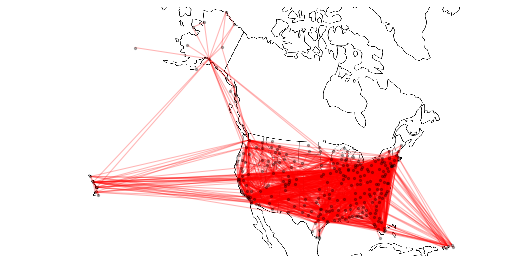

In [19]:
plot_network_usa(net, xycoords, bg_figname)

## c) In order to reduce the number of plotted links, compute both the maximal and minimal spanning tree (MST) of the network and visualize them. Then, answer following questions: 

### If the connections of Hawai’i are considered, how would you explain the differences between the minimal and maximal spanning trees?

**what is minimal/ maximal spanning trees?:**

a tree built using a subset of the
original links, so that
1. the tree contains all the nodes
of the original network
2. the sum of link weights is minimized or maximized

![mst](mst.png)

/home/adam/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 0.98, 'Maximal spanning tree')

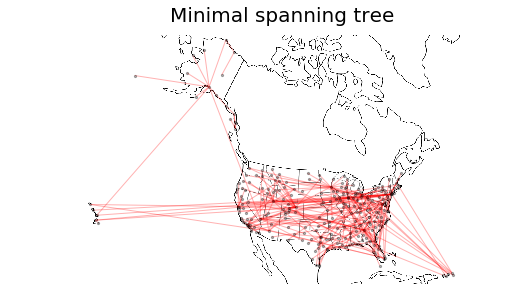

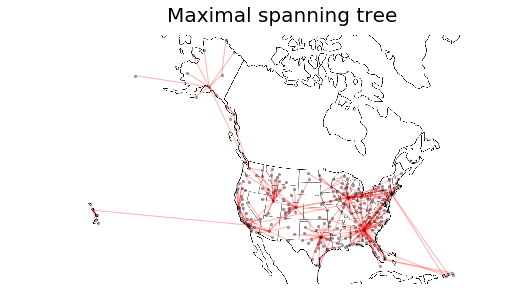

In [20]:
min_st = list(nx.minimum_spanning_edges(net))
fig1 = plot_network_usa(net, xycoords, bg_figname, min_st)
plt.suptitle("Minimal spanning tree", size=20)

max_st = list(nx.maximum_spanning_edges(net))
fig2 = plot_network_usa(net, xycoords, bg_figname, max_st)
plt.suptitle("Maximal spanning tree", size=20)

/home/adam/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 0.98, 'Maximal spanning tree by negating the weights')

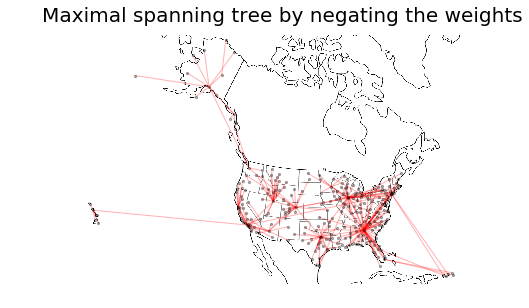

In [21]:
temp_net = net.copy()
for (u,v,d) in temp_net.edges(data=True):
    d['weight']=-d['weight']#edge['weight']
edges2 = list(nx.minimum_spanning_edges(temp_net))
max_st2 = list(nx.maximum_spanning_edges(net))
fig2 = plot_network_usa(net, xycoords, bg_figname, max_st2)
plt.suptitle("Maximal spanning tree by negating the weights", size=20)


1. For the maximal spanning tree, tries to maximize the weight. Hence, a good strategy is to visit a regional hub and visit all the nodes in the region via that hub. In addition, we can observe that  there is only one flight to Hawai which is from Los Angeles. This means between all flights to Hawaii, Los Angeles - Hawaii has the most flights. 

2. For minimal spanning tree, the network tries to minimized the weight (distance), hence, will tend to go from node to node by finding the nearest node. Hence, the tree appears to be more 'messy'. There are many flights to Hawai which means these flights are not only least frequent flights to Hawai but also least frequent flights in US. 

This is because
only one of them would be enough to connect Hawai but in spanning minimum trees we
choose edges which has the least weights and not forming cycles ones.

### If you would like to understand the overall organization of the air traffic in US, would you use the minimal or maximal spanning tree? Why?

maximal spanning tree because the flights that are visualized are the most frequent ones which means people use these flights
the most. In addition, we can view more of the domestic flights that are from a larger airport to a smaller airprot

## d) Threshold and visualize the network by taking only the strongest M links into account, where M is the number of links in the MST. Then, answer following questions.

/home/adam/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 0.98, 'Strongest 278 links (maximal spanning tree)')

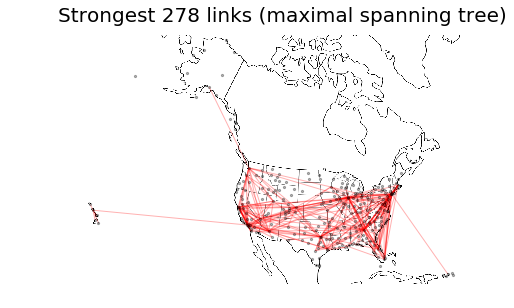

In [22]:
# for maximal
max_m = len(max_st)
edges_max_st = sorted(net.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
plot_network_usa(net, xycoords, bg_figname, edges_max_st[:max_m])
plt.suptitle(f'Strongest {max_m} links (maximal spanning tree)', size=20)